<a href="https://colab.research.google.com/github/MarcosVel/Deep-Learning/blob/master/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

2023-05-21 18:49:40.881340: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-21 18:49:40.911025: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 18:49:41.410015: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.12.0


In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-05-21 18:49:42.212082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 18:49:42.229115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 18:49:42.229238: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Load the data

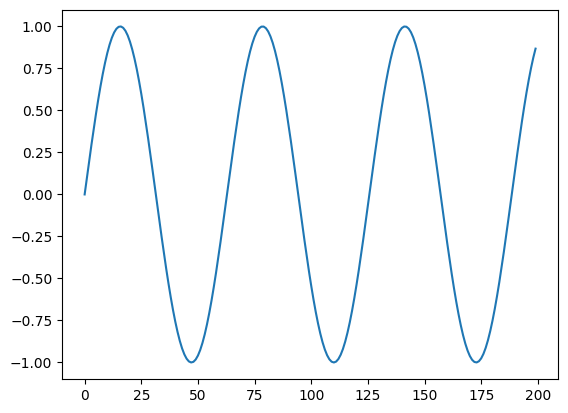

In [ ]:
series = np.sin(0.1*np.arange(200))
plt.plot(series)
plt.show()

In [ ]:
# build the dataset
T = 10
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, "Y.shape:", Y.shape)

X.shape: (190, 10) Y.shape: (190,)


In [ ]:
# how to make it N X T X D?   
X = X.reshape(-1, T, 1) # N x T x D
print("X.shape:", X.shape)

X.shape: (190, 10, 1)


# Build the model

In [ ]:
# instantiate the model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

2023-05-21 18:49:42.557729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 18:49:42.557909: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 18:49:42.557988: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Train

In [ ]:
# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],   # train on first half of data (second half is for validation)
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]), # validate on second half of data (first half is for training)
)

Epoch 1/80


2023-05-21 18:49:44.075530: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-05-21 18:49:44.079261: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x358597d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-21 18:49:44.079279: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2023-05-21 18:49:44.082825: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-21 18:49:44.985004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8801
2023-05-21 18:49:45.024431: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-05-21 18:49:4

3/3 [==============================] - 2s 62ms/step - loss: 0.2549 - val_loss: 0.0611
Epoch 2/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0582 - val_loss: 0.1026
Epoch 3/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0341 - val_loss: 0.0235
Epoch 4/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0263 - val_loss: 0.0351
Epoch 5/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0316 - val_loss: 0.0095
Epoch 6/80
3/3 [==============================] - 0s 12ms/step - loss: 0.0076 - val_loss: 0.0123
Epoch 7/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0127 - val_loss: 0.0186
Epoch 8/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0101 - val_loss: 0.0034
Epoch 9/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0060 - val_loss: 0.0088
Epoch 10/80
3/3 [==============================] - 0s 11ms/step - loss: 0.0076 - val_loss: 0.0033
Epoch 11/80
3/3 [=======================

# Evaluate

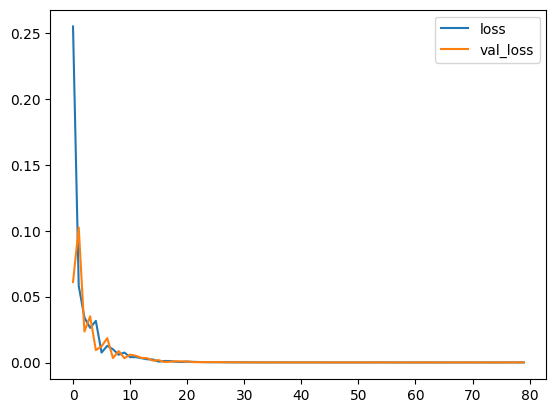

In [ ]:
# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Predictions

In [ ]:
# make predictions
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
    i += 1
    
    # update the predictions list
    validation_predictions.append(p)

1/1 [==============================] - 0s 12ms/step


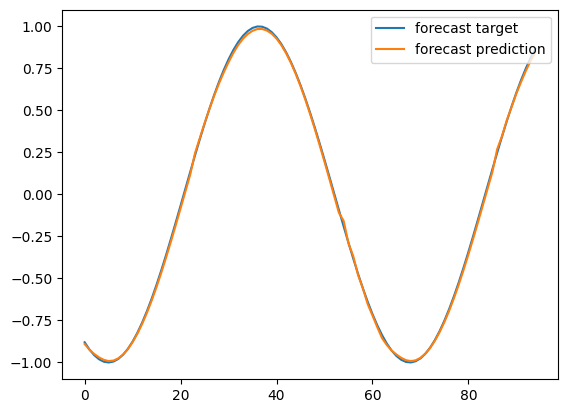

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()

In [ ]:
# forecast future values (use only self-predictions for making future predictions)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

1/1 [==============================] - 0s 11ms/step


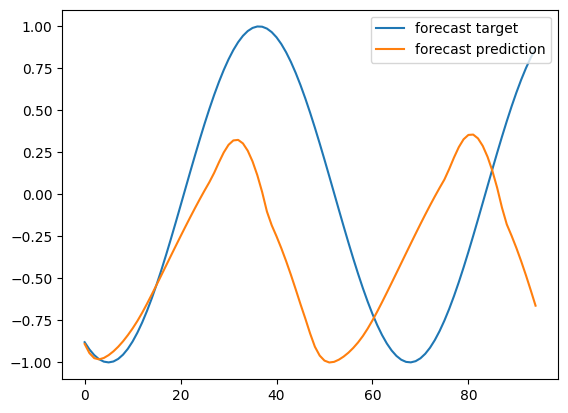

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()
plt.show()